In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nagoya_Station_data = pd.read_csv("./datas/Nagoya_Station_data.csv")
Nagoya_Station_data

,year,station_no,station_name,josha_num,ward_office,meijo,meiko,kamiida,higashiyama,tsurumai,sakuradori,aonami,shinkansen,tokaido,chuo,kansai,meitetsu,kintetsu,lines
0,1991,0,大曽根,4785428.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,1992,0,大曽根,4660204.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1993,0,大曽根,4592223.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1994,0,大曽根,4669642.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1995,0,大曽根,4629653.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,1996,0,大曽根,4498914.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,1997,0,大曽根,4663364.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
7,1998,0,大曽根,4619636.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8,1999,0,大曽根,4375248.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,2000,0,大曽根,3744964.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [2]:
#jrなどの利用者数を合算する為にgroupbyする
datas = Nagoya_Station_data.groupby(['station_name','year'])[['josha_num','lines']].sum()

print(datas)

                   josha_num  lines
station_name year                  
いりなか         1991  3632472.0      1
             1992  3549946.0      1
             1993  3572420.0      1
             1994  3484716.0      1
             1995  3517137.0      1
             1996  3564984.0      1
             1997  3667531.0      1
             1998  3822759.0      1
             1999  3774603.0      1
             2000  3872345.0      1
             2001  5957099.0      1
             2002  4311543.0      1
             2003  3949068.0      1
             2004  2831220.0      1
             2005  2664289.0      1
             2006  2709581.0      1
             2007  2701426.0      1
             2008  2759197.0      1
             2009  2723242.0      1
             2010  2882630.0      1
             2011  2489562.0      1
             2012  2521816.0      1
             2013  2614891.0      1
             2014  2589814.0      1
             2015  2613444.0      1
ささしまライブ      2004   119622.0

In [3]:
################ここ以降は、josha数の対数でとって計算してみる。

#0データはlogを取ることができないので、調整のため、ごく小さな値を与える。
datas['log_josha_num']=np.log(datas['josha_num']+10**-20)
datas

josha_num  lines  log_josha_num
station_name year                                 
いりなか         1991  3632472.0      1      15.105424
             1992  3549946.0      1      15.082443
             1993  3572420.0      1      15.088754
             1994  3484716.0      1      15.063897
             1995  3517137.0      1      15.073158
             1996  3564984.0      1      15.086670
             1997  3667531.0      1      15.115029
             1998  3822759.0      1      15.156483
             1999  3774603.0      1      15.143806
             2000  3872345.0      1      15.169371
             2001  5957099.0      1      15.600094
             2002  4311543.0      1      15.276806
             2003  3949068.0      1      15.188990
             2004  2831220.0      1      14.856218
             2005  2664289.0      1      14.795448
             2006  2709581.0      1      14.812305
             2007  2701426.0      1      14.809290
             2008  2759197.0      1      14.830450
             2009  2723242.0      1      14.817334
             2010  2882630.0      1      14.874214
             2011  2489562.0      1      14.727617
             2012  2521816.0      1      14.740490
             2013  2614891.0      1      14.776733
             2014  2589814.0      1      14.767097
             2015  2613444.0      1      14.776179
ささしまライブ      2004   119622.0      1      11.692092
             2005   882339.0      1      13.690332
             2006   194865.0      1      12.180062
             2007   195160.0      1      12.181575
             2008   170932.0      1      12.049021
...                      ...    ...            ...
黒川           2011  4723563.0      2      15.368074
             2012  4845255.0      2      15.393510
             2013  4943361.0      2      15.413556
             2014  4939585.0      2      15.412792
             2015  5069276.0      2      15.438709
ﾅｺﾞﾔﾄﾞｰﾑ前矢田  1991        0.0      0     -46.051702
             1992        0.0      0     -46.051702
             1993        0.0      0     -46.051702
             1994        0.0      0     -46.051702
             1995        0.0      0     -46.051702
             1996        0.0      0     -46.051702
             1997        0.0      0     -46.051702
             1998        0.0      0     -46.051702
             1999   103513.0      1      11.547452
             2000   630367.0      1      13.354057
             2001  1873634.0      1      14.443390
             2002  1850147.0      1      14.430776
             2003  1900512.0      1      14.457634
             2004  2037975.0      1      14.527467
             2005  2305746.0      1      14.650915
             2006  3271822.0      1      15.000858
             2007  3042112.0      1      14.928063
             2008  3088156.0      1      14.943085
             2009  3135204.0      1      14.958205
             2010  3021405.0      1      14.921233
             2011  3508196.0      1      15.070613
             2012  3453763.0      1      15.054975
             2013  3676697.0      1      15.117525
             2014  3710770.0      1      15.126750
             2015  3822943.0      1      15.156531

[3370 rows x 3 columns]

In [4]:
# 非0のみのデータ
# nz_datas=datas[['josha_num','lines']].iloc[datas['josha_num'].nonzero()[0]]
# nz_datas

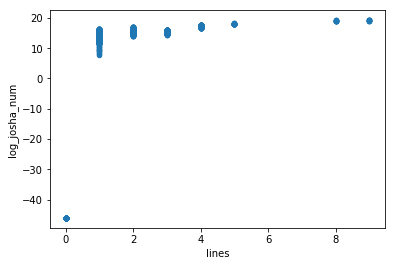

In [5]:
datas.plot(x='lines',y='log_josha_num', kind='scatter')

In [6]:
#相関係数
#logを取らない場合の方が相関係数が高い。。。
np.corrcoef(datas['lines'], datas['log_josha_num'])

array([[1.        , 0.38136283],
       [0.38136283, 1.        ]])

In [7]:
X = datas.lines.values

A = np.vstack([X, np.ones(len(X))]).T

Y = datas.log_josha_num.values

#plt.plot(X,Y,'o')

In [8]:
a,b = np.linalg.lstsq(A,Y,rcond=None)[0]

print(a,b)

5.913420411339825 3.4559767705390305


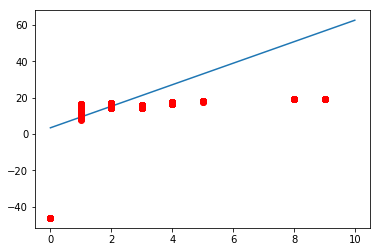

In [9]:
#推定Yのplot
X2 = np.arange(0, 10, 0.01)
plt.plot(X2, a*X2 + b)

plt.plot(X,Y,'ro')

In [10]:
#決定係数を手計算する

#残差計算
child = ((datas['log_josha_num'] - (datas['lines']*a + b))**2).sum()
child

621657.0317919869

In [11]:
#分母の計算
mother = ((datas['log_josha_num'] - datas['log_josha_num'].mean())**2).sum()
mother

727456.5730244834

In [12]:
#決定係数
#0.39なので、対数取らないで計算した方が良さそう。。。。

R = 1 - child / mother
R

0.14543760432684372